In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

In [2]:
df = geopandas.read_file('/glade/scratch/molina/tl_2020_us_state.shp')
latinx_data = pd.read_excel('/glade/scratch/molina/census2020_latinx.xlsx',engine='openpyxl')

df = df[np.isin(df['NAME'].values,latinx_data['STATE'].values)]
latinx_data = latinx_data[np.isin(latinx_data['STATE'].values,df['NAME'].values)]

df = df.reset_index(drop=True).set_index('NAME')
latinx_data = latinx_data.reset_index(drop=True).rename(columns={"STATE": "NAME"}).set_index('NAME')

df = df[(df.index!='Alaska')&(df.index!='Hawaii')]

df = pd.concat([df, latinx_data], axis=1, sort=True).reindex(df.index)

crs = ccrs.LambertConformal()  # Define the CartoPy CRS object.
crs_proj4 = crs.proj4_init
df_lc = df#.to_crs(crs_proj4)

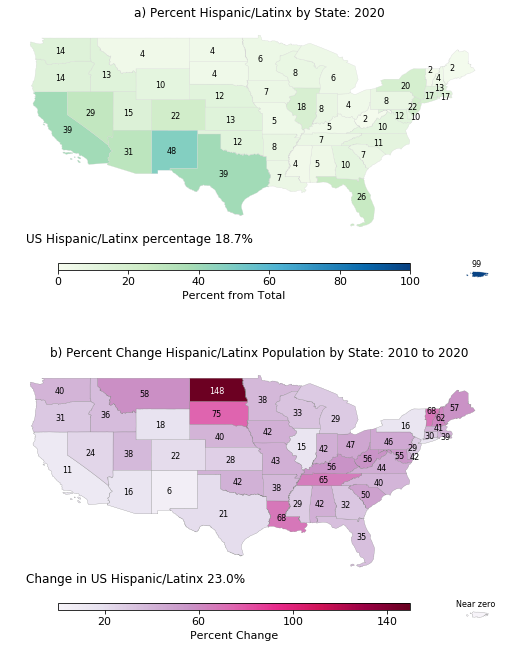

In [3]:
#-----------------------%

fig = plt.figure(figsize=(7.,9.))

#-----------------------%

ax1 = fig.add_axes([0., 0.5, 1., 0.5], projection=ccrs.LambertConformal())

ax1.set_title('a) Percent Hispanic/Latinx by State: 2020',fontsize=12)

cs1 = df_lc.plot(column='HISPANIC ORGIN PERCENT',
                 cmap='GnBu',edgecolor='lightgrey',lw=0.25,ax=ax1,
                 vmin=0,vmax=100)

ax1.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                bottom=False, top=False, left=False, right=False)

ax1.outline_patch.set_edgecolor('white')

ax1.annotate('US Hispanic/Latinx percentage 18.7%', xy=(0.05, 0.625), 
             xycoords='figure fraction', fontsize=12)

for x_val, y_val, h_val, st_val in zip(df_lc.centroid.x.values,df_lc.centroid.y.values,
                                       np.around(df_lc['HISPANIC ORGIN PERCENT'].values).astype(int),
                                       df_lc.index):
    
    if st_val == 'Vermont':
        ax1.annotate(h_val, xy=(x_val - 0.5, y_val + 0.35), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'New Hampshire':
        ax1.annotate(h_val, xy=(x_val - 0.5, y_val - 0.25), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Puerto Rico':
        ax1.annotate(h_val, xy=(x_val - 1.0, y_val + 1.0), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Massachusetts':
        ax1.annotate(h_val, xy=(x_val - 0.75, y_val - 0.0), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Rhode Island':
        ax1.annotate(h_val, xy=(x_val + 0.075, y_val - 0.65), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Delaware':
        ax1.annotate(h_val, xy=(x_val + 0.1, y_val - 0.65), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Maryland':
        ax1.annotate(h_val, xy=(x_val - 0.75, y_val - 0.5), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Connecticut':
        ax1.annotate(h_val, xy=(x_val - 0.75, y_val - 0.5), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Florida':
        ax1.annotate(h_val, xy=(x_val + 0.25, y_val - 0.5), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')
        
    elif st_val == 'Michigan':
        ax1.annotate(h_val, xy=(x_val + 0.0, y_val - 1.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'District of Columbia':
        continue
        
    else:
        ax1.annotate(h_val, xy=(x_val - 1.0, y_val - 0.5), xycoords='data', fontsize=8, #fontweight='bold', 
                     color='k')

#-------

cax = fig.add_axes([0.1, 0.575, 0.7, 0.01])
cmap = mpl.cm.GnBu
norm = mpl.colors.Normalize(vmin=0,vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Percent from Total', fontsize=11)
cb1.set_ticks([0,20,40,60,80,100])
cb1.ax.tick_params(labelsize=11)

#-----------------------%

ax2 = fig.add_axes([0., -0.025, 1., 0.5], projection=ccrs.LambertConformal())

ax2.set_title('b) Percent Change Hispanic/Latinx Population by State: 2010 to 2020', 
              fontsize=12)

cs2 = df_lc.plot(column='PERCENT CHANGE SINCE 2010',
                 cmap='PuRd',edgecolor='0.5',lw=0.25,ax=ax2,
                 vmin=0,vmax=150)

ax2.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                bottom=False, top=False, left=False, right=False)

ax2.outline_patch.set_edgecolor('white')

ax2.annotate('Change in US Hispanic/Latinx 23.0%', xy=(0.05, 0.1), 
             xycoords='figure fraction', fontsize=12)

for x_val, y_val, h_val, st_val in zip(df_lc.centroid.x.values,df_lc.centroid.y.values,
                                       np.around(df_lc['PERCENT CHANGE SINCE 2010'].values).astype(int),
                                       df_lc.index):
    
    if st_val == 'Vermont':
        ax2.annotate(h_val, xy=(x_val - 0.5, y_val + 0.35), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'New Hampshire':
        ax2.annotate(h_val, xy=(x_val - 0.5, y_val - 0.25), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Puerto Rico':
        ax2.annotate('Near zero', xy=(x_val - 3.0, y_val + 1.0), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Massachusetts':
        ax2.annotate(h_val, xy=(x_val - 0.75, y_val - 0.0), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Rhode Island':
        ax2.annotate(h_val, xy=(x_val + 0.075, y_val - 0.65), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Delaware':
        ax2.annotate(h_val, xy=(x_val + 0.1, y_val - 0.65), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Maryland':
        ax2.annotate(h_val, xy=(x_val - 0.75, y_val - 0.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Connecticut':
        ax2.annotate(h_val, xy=(x_val - 0.75, y_val - 0.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'Florida':
        ax2.annotate(h_val, xy=(x_val + 0.25, y_val - 0.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'North Dakota':
        ax2.annotate(h_val, xy=(x_val - 1.0, y_val - 0.5), xycoords='data', #fontweight='bold', 
                     color='w', fontsize=8)
        
    elif st_val == 'Michigan':
        ax2.annotate(h_val, xy=(x_val + 0.0, y_val - 1.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)
        
    elif st_val == 'District of Columbia':
        continue
        
    else:
        ax2.annotate(h_val, xy=(x_val - 1.0, y_val - 0.5), xycoords='data', #fontweight='bold', 
                     fontsize=8)

#-----

cax = fig.add_axes([0.1, 0.05, 0.7, 0.01])

cmap = mpl.cm.PuRd
norm = mpl.colors.Normalize(vmin=0,vmax=150)

cb1 = mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap, norm=norm, orientation='horizontal')

cb1.set_label('Percent Change', fontsize=11)
cb1.set_ticks([20,60,100,140])
cb1.ax.tick_params(labelsize=11) 

#-----------------------%

plt.savefig(f"../figures/fig7.png", bbox_inches='tight', dpi=500)
plt.show()

#-----------------------%